In [123]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib
from matplotlib import pyplot as plt
import sklearn
import openpyxl
import statsmodels.api as sm
import seaborn as sns
import statsmodels.stats.proportion
from sklearn.utils import resample
from sklearn.metrics import accuracy_score



## Построение доверительных интервалов

In [2]:
data = pd.read_excel('data_28.xlsx',dtype = float)
data = data.T
data.reset_index(inplace=True)
data.rename(columns={'index': 'value'}, inplace=True)
data

,value
0,22.596015
1,25.902554
2,30.125299
3,28.475713
4,28.727587
...,...
195,31.981179
196,30.209815
197,21.498561
198,27.874356


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   200 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


Сначала построем гистограмму, чтобы получить представление о форме плотности распределения.

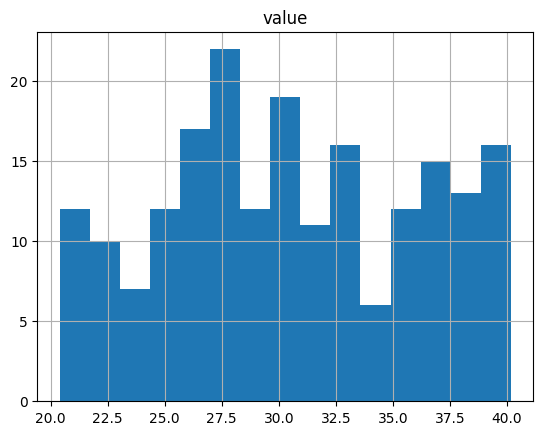

In [67]:
data.hist(bins=15)
plt.show()

По гистограмме уже можем предположить, что у нас равномерное распределение.

c:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


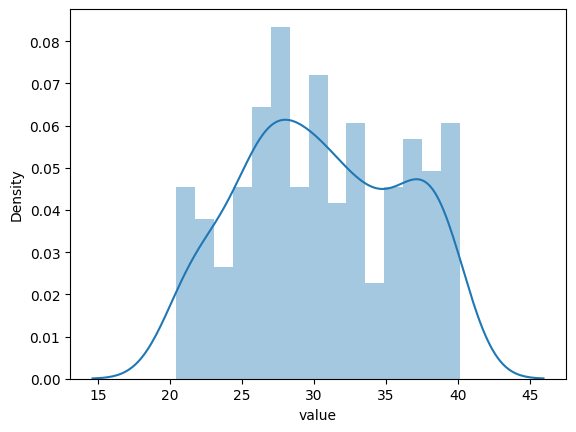

In [105]:
sns.distplot(a=data.value,bins=15)
plt.show()


Наложим график соответствующей теоретической плотности распределения на полученную гистограмму

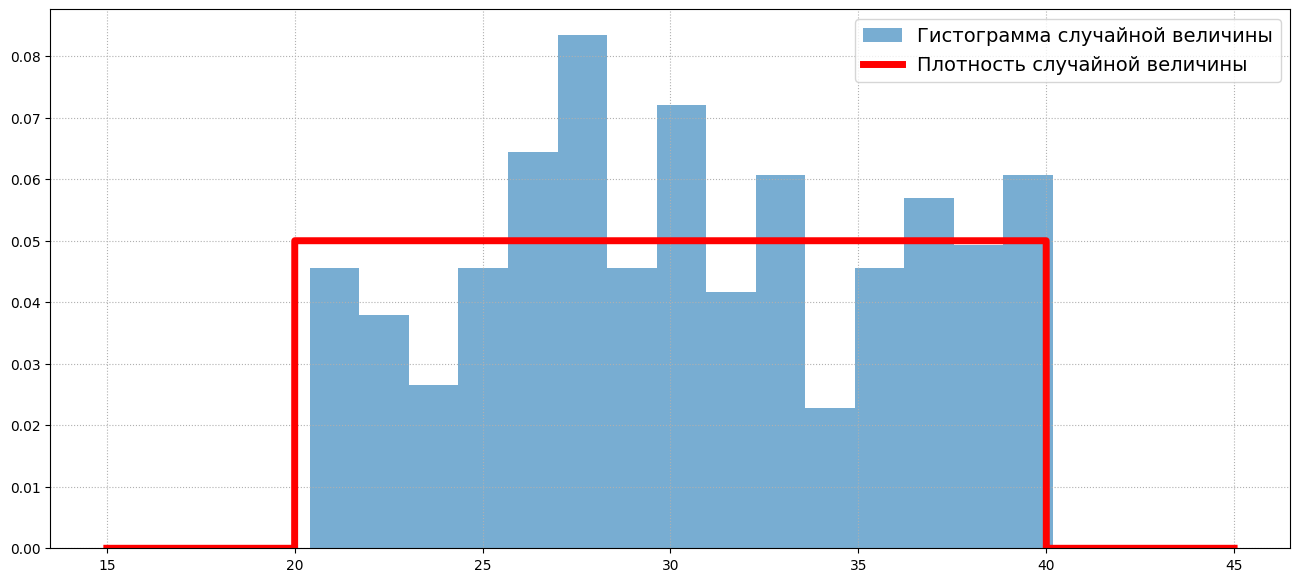

In [22]:
grid = np.linspace(15,45 , 10001)

plt.figure(figsize=(16, 7))
plt.hist(data,  bins=15, density=True, alpha=0.6,
         label='Гистограмма случайной величины')
plt.plot(grid, ss.uniform.pdf(grid,loc=20,scale=20), color='red', lw=5,
         label='Плотность случайной величины')
plt.legend(fontsize=14, loc=1)
plt.grid(ls=':')
plt.show()


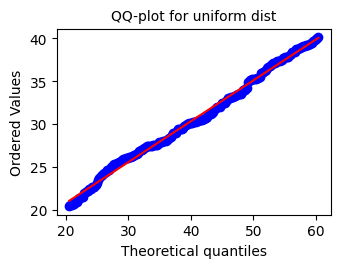

In [67]:
fig = plt.figure()
ax_uniform = fig.add_subplot(221)
res = ss.probplot(data['value'], dist=ss.uniform, sparams=(
    np.min(data['value']), np.max(data['value'])), plot=ax_uniform)
ax_uniform.set_title("QQ-plot for uniform dist", fontsize=10.)
fig.tight_layout()
plt.show()


Построив квантильный график для равномерного распределения, мы можем сделать окончательный вывод, что у нас равномерное распределение

In [74]:
ss.shapiro(data)#проверка нашей выборки на нормальность. Гипотеза не принимается

ShapiroResult(statistic=0.9611491560935974, pvalue=2.6387931939098053e-05)

Вычисление доверительных интервалов используя Bootstrapping. Это позволяет оценивать распределение выборки для большинства статистических данных с использованием методов случайной выборки.

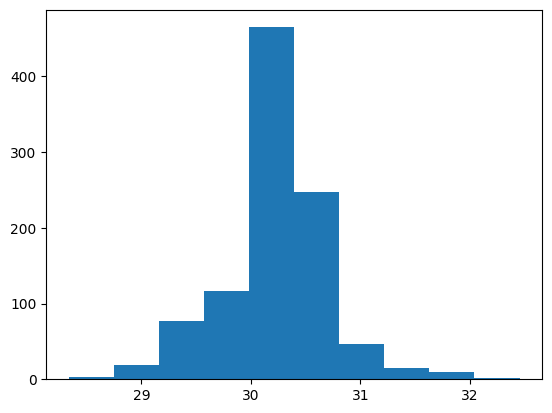


90.0 доверительный интервал находиться между 29.3881105440204 и 31.0517535124353


In [133]:

x = data['value']

# настраиваем bootstrap
n_iterations = 1000  
n_size = int(len(x))

medians = list()
for i in range(n_iterations):         #генерируем 1000 выборок размера наших данных, вычисляем их медианы и загружаем в список.
   s = resample(x, n_samples=n_size)
   m = np.median(s)
   medians.append(m)


plt.hist(medians)
plt.show()

# доверительные интервалы
alpha = 0.9
p = ((1.0-alpha)/2.0) * 100
lower = np.percentile(medians, p)#вычисляем нижнюю границу
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = np.percentile(medians, p)#вычисляем верхнюю границу

print(f"\n{alpha*100} доверительный интервал находиться между {lower} и {upper}")


Существует вероятность 90%, что данный доверительный интервал содержит истинное значение генеральной совокупности.

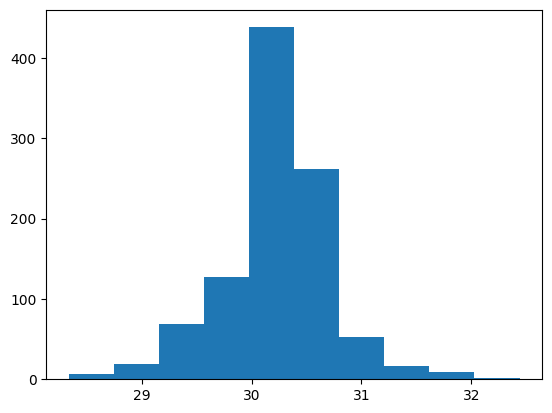


95.0 доверительный интервал находиться между 29.16076666329399 и 31.22176828882855


In [132]:
x = data['value']

# настраиваем bootstrap
n_iterations = 1000
n_size = int(len(x))

medians = list()
# генерируем 1000 выборок размера наших данных, вычисляем их медианы и загружаем в списо
for i in range(n_iterations):
   s = resample(x, n_samples=n_size)
   m = np.median(s)
   medians.append(m)


plt.hist(medians)
plt.show()

# доверительные интервалы
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = np.percentile(medians, p)  # вычисляем нижнюю границу
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = np.percentile(medians, p)  # вычисляем верхнюю границу

print(f"\n{alpha*100} доверительный интервал находиться между {lower} и {upper}")


Существует вероятность 95%, что данный доверительный интервал содержит истинное значение генеральной совокупности.

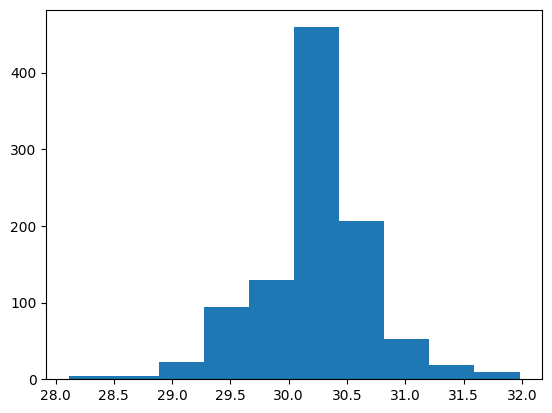


99.0 доверительный интервал находиться между 28.601411082391625 и 31.7627240969597


In [131]:
x = data['value']

# настраиваем bootstrap
n_iterations = 1000
n_size = int(len(x))

medians = list()
# генерируем 1000 выборок размера наших данных, вычисляем их медианы и загружаем в списо
for i in range(n_iterations):
   s = resample(x, n_samples=n_size)
   m = np.median(s)
   medians.append(m)


plt.hist(medians)
plt.show()

# доверительные интервалы
alpha = 0.99
p = ((1.0-alpha)/2.0) * 100
lower = np.percentile(medians, p)  # вычисляем нижнюю границу
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = np.percentile(medians, p)  # вычисляем верхнюю границу

print(f"\n{alpha*100} доверительный интервал находиться между {lower} и {upper}")


Существует вероятность 99%, что данный доверительный интервал содержит истинное значение генеральной совокупности.